<a href="https://colab.research.google.com/github/yyj0128/HotelBooking_canceled_prediction_project/blob/main/Hotel_booking_canceled_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **호텔 예약 취소 & 최적의 오버부킹 비율 예측 모델 생성**

◼ 데이터 

 [Hotel Booking Demand](https://www.kaggle.com/jessemostipak/hotel-booking-demand)

<br>

◼ 컬럼 설명 

* hotel : 호텔의 종류 (H1 : Resort Hotel,  H2 : City Hotel)

* is_canceled : 예약 취소 여부 (1 : 취소 , 0 : 취소 x)

* lead_time :예약 후 도착할 때까지 시간

* arrival_date_year : 도착일(년)

* arrival_date_month : 도착일(월)

* arrival_date_week_number : 도착일(주차)

* arrival_date_day_of_month : 도착일(일)

* stays_in_weekend_nights : 주말 숙박일 수

* stays_in_week_nights : 평일 숙박일 수

* adults : 성인 수

* children : 어린이 수
 
* babies : 아기 수

* meal : 예약된 식사 유형 (SC : 0회 , Undefined : 0회 , BB : 1회 , HB: 2회 , FB: 3회)

* country : 나라

* market_segment : 시장유형 (Online TA, Offline TA/TO, Groups, Direct, Corporate, Complementary, Aviation, 
Undefined)

* distribution_channel : 유입 경로 (TA/TO : 여행사 투어, Direct, Corporate, GDS, Undefined)

* is_repeated_guest : 재방문 고객 (1 : 재방문)

* previous_cancellations : 이전예약 취소 수

* previous_bookings_not_canceled : 이전예약 미취소 수 

* reserved_room_type : 예약한 객실 유형 (A, B, C, D, E, F, G, H, L, P)

* assigned_room_type : 할당된 객실 유형 (A, B, C, D, E, F, G, H, I, K, L, P)

* booking_changes : 예약 변경 수

* deposit_type : 예약금 유형(No Deposit, Non Refund, Refundable)

* agent : 에이전트ID 

* company : 회사ID

* days_in_waiting_list : 예약 대기일 수

* customer_type : 고객 유형 (Transient, Transient-Party, Contract, Group)

* adr : 평균일일요금(=숙박요금/숙박일수)

* required_car_parking_spaces : 고객별 필요 주차공간

* total_of_special_requests : 고객의 특별 요구사항 수

* reservation_status : 숙박 최종 현황 (Check-Out, Canceled, No-Show)

* reservation_status_date : 최종 갱신일

## 1. 데이터 로드 및 EDA

In [1]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''
# data 폴더로 이동

%cd /content/drive/MyDrive/project/data
'''

/content/drive/MyDrive/project/data


In [ ]:
'''
# /content/drive/MyDrive/project/data/ 폴더 밑에 압축을 해제

!unzip '/content/drive/MyDrive/project/data/hotel_data.zip' -d '/content/drive/MyDrive/project/data'
'''

Archive:  /content/drive/MyDrive/project/data/hotel_data.zip
  inflating: /content/drive/MyDrive/project/data/hotel_bookings.csv  


In [2]:
### 패키지 설치

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
### 데이터 로드

hotel = pd.read_csv('/content/drive/MyDrive/project/data/hotel_data/hotel_bookings.csv')

print(hotel.shape)
hotel.head(5)

(119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel.describe()

In [ ]:
### 결측치 비율 확인

for i in range(len(hotel.columns)):
    if hotel.iloc[:,i].isnull().sum()>0 :
        temp_col = hotel.iloc[:,i]
        percentage = temp_col.isnull().sum() / len(temp_col)
        print('{:}의 결측치는 전체의 {:.3%}입니다.'.format(temp_col.name,percentage))

children의 결측치는 전체의 0.003%입니다.
country의 결측치는 전체의 0.409%입니다.
agent의 결측치는 전체의 13.686%입니다.
company의 결측치는 전체의 94.307%입니다.


In [ ]:
### 명목형 변수 확인

for col in hotel.select_dtypes(include=object):
  print(col)
  print('-----------------------------')
  print(hotel[col].value_counts())
  print()

hotel
-----------------------------
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

arrival_date_month
-----------------------------
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

meal
-----------------------------
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

country
-----------------------------
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
GUY        1
DMA        1
HND        1
MRT        1
CYM        1
Name: country, Length: 177, dtype: int64

market_segment
-----------------------------
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation      

In [ ]:
'''
# 이상치 확인 (unique 값 정리해서 dict로 만들기)
uniq_dict = {}
for i in hotel.iloc[:, 27:].columns:
  temp = list(hotel[i].unique())
  uniq_dict[i]= sorted(temp)

for key, value in uniq_dict.items():
  print(key, ':', value)
'''

adr : [-6.38, 0.0, 0.26, 0.5, 1.0, 1.29, 1.48, 1.56, 1.6, 1.8, 2.0, 2.4, 3.0, 3.38, 4.0, 4.5, 5.0, 5.2, 5.25, 6.0, 6.4, 6.5, 6.67, 6.9, 7.0, 7.8, 8.0, 8.34, 8.43, 9.0, 9.14, 9.67, 9.71, 10.0, 10.5, 10.8, 11.53, 11.75, 12.0, 12.5, 13.0, 14.0, 15.0, 16.0, 16.92, 17.5, 17.6, 18.0, 18.5, 18.6, 19.0, 19.09, 19.15, 19.35, 20.0, 20.88, 21.0, 21.37, 21.5, 22.0, 22.11, 22.4, 22.5, 22.86, 23.0, 23.5, 23.6, 23.7, 23.93, 24.0, 24.5, 24.7, 24.79, 24.8, 24.83, 24.87, 24.94, 24.95, 25.0, 25.11, 25.42, 25.5, 25.64, 25.65, 25.92, 26.0, 26.1, 26.23, 26.26, 26.33, 26.35, 26.5, 26.64, 26.93, 26.95, 26.99, 27.0, 27.07, 27.35, 27.36, 27.43, 27.5, 27.53, 27.54, 27.56, 27.6, 27.69, 27.81, 27.9, 28.0, 28.1, 28.3, 28.33, 28.5, 28.64, 28.71, 28.79, 28.8, 29.0, 29.01, 29.06, 29.11, 29.16, 29.3, 29.34, 29.41, 29.6, 29.72, 29.73, 29.75, 29.78, 29.8, 29.96, 29.97, 30.0, 30.03, 30.24, 30.3, 30.4, 30.43, 30.5, 30.6, 30.67, 30.71, 30.8, 30.86, 30.9, 30.96, 30.99, 31.0, 31.05, 31.12, 31.16, 31.18, 31.2, 31.21, 31.4, 31.

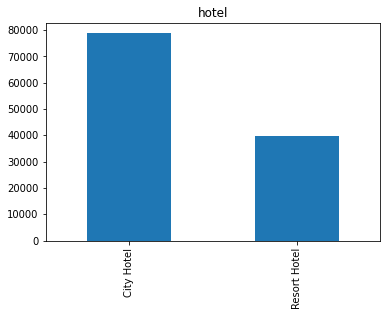

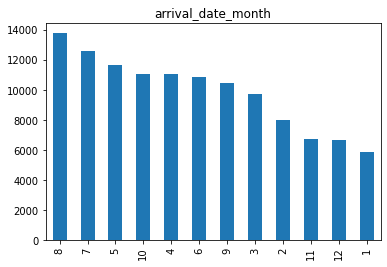

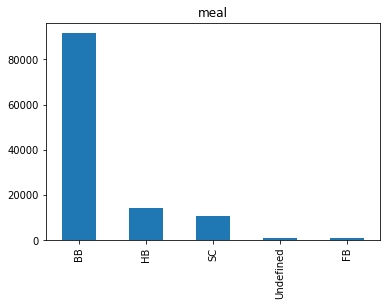

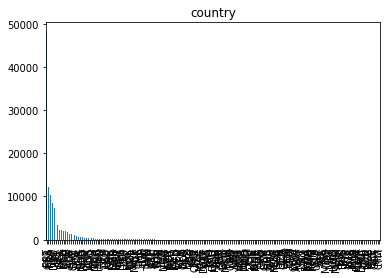

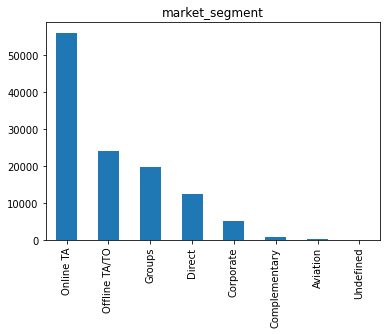

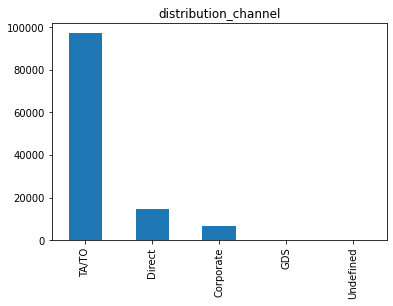

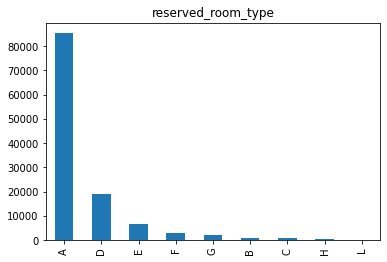

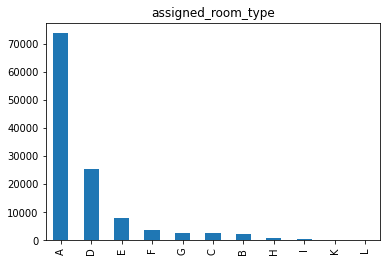

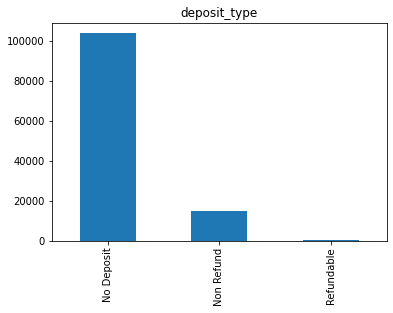

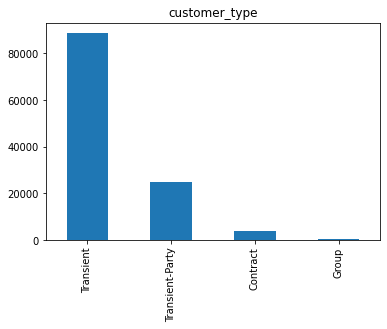

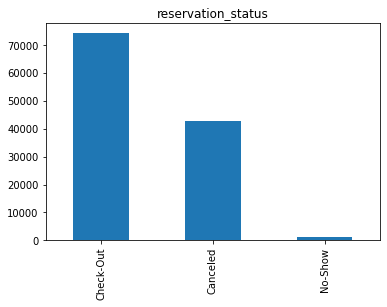

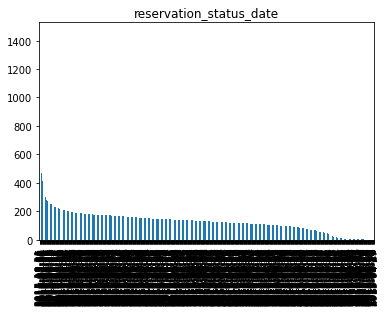

In [ ]:
# 범주형 변수 살펴보기
category_feature = [col for col in hotel.columns if hotel[col].dtypes == 'object']

for col in category_feature:
  hotel[col].value_counts().plot(kind='bar')
  plt.title(col)
  plt.show()

In [ ]:
# 이산형 변수만 정리하기
numerical_feature = list(set(hotel.columns) - set(category_feature) - set(['is_canceled']))


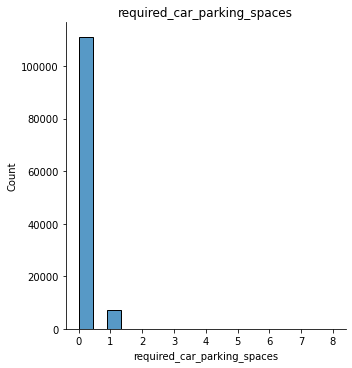

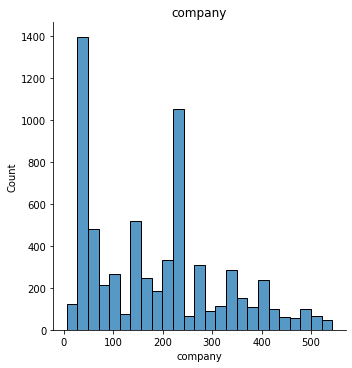

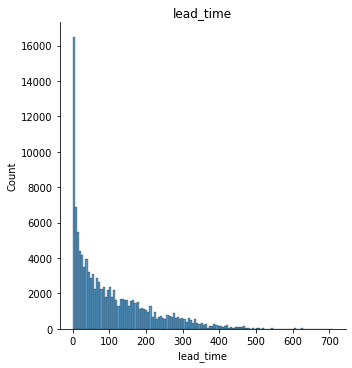

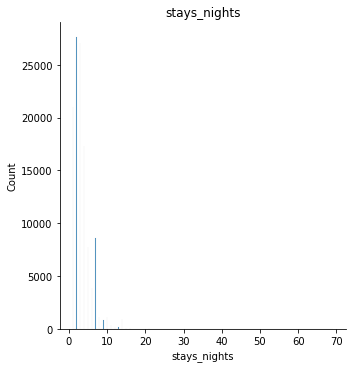

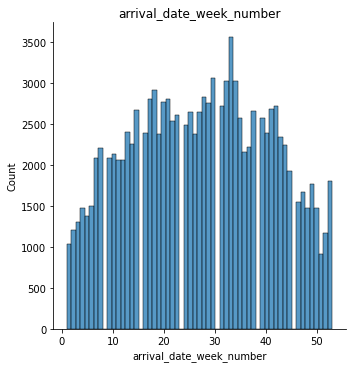

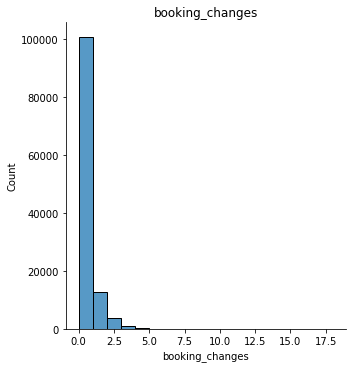

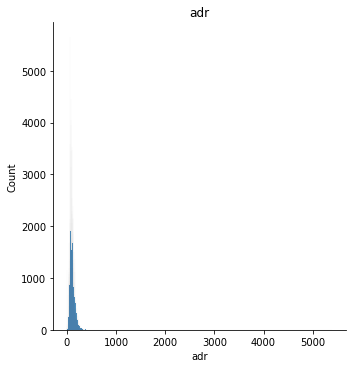

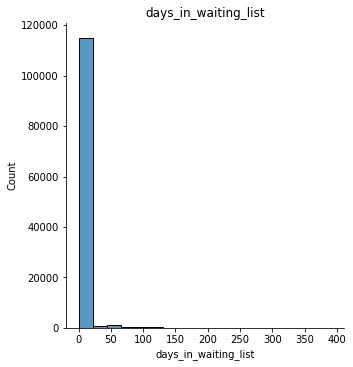

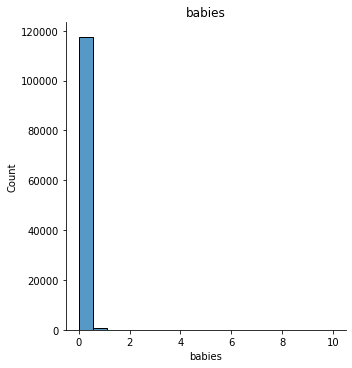

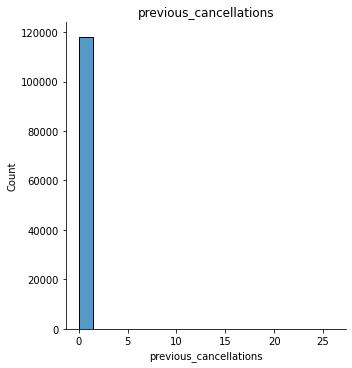

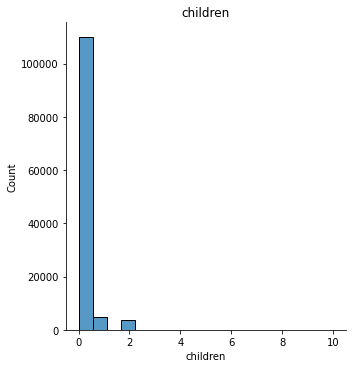

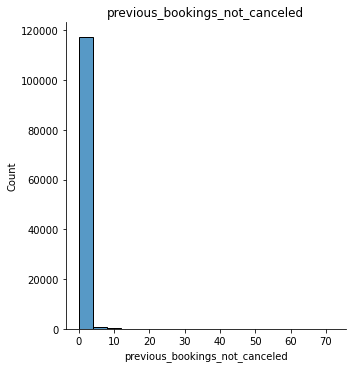

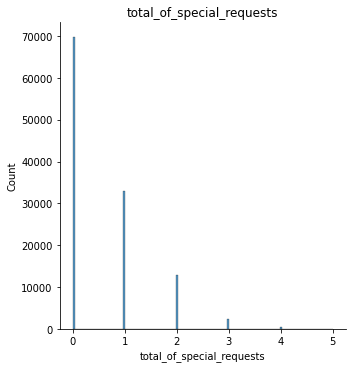

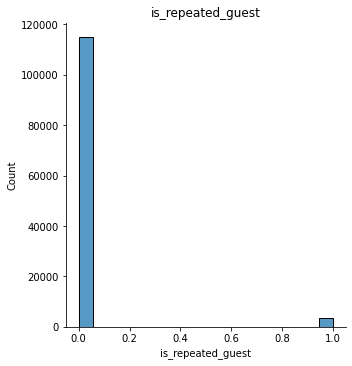

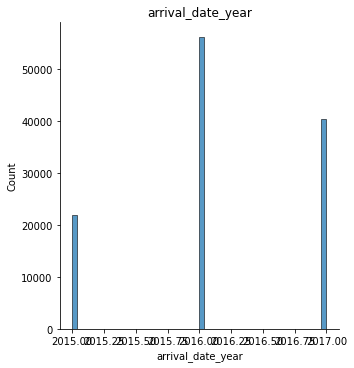

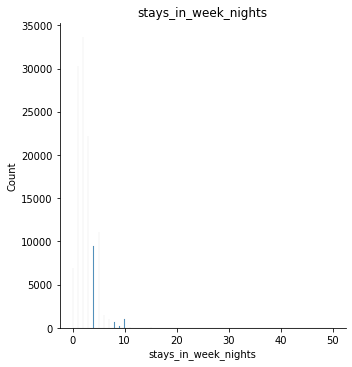

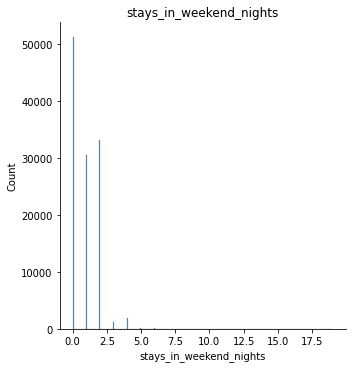

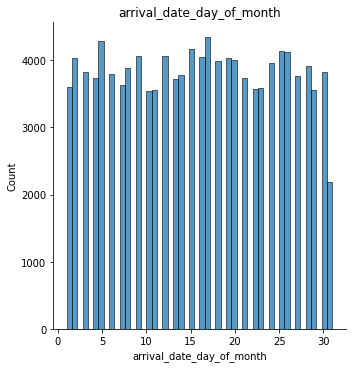

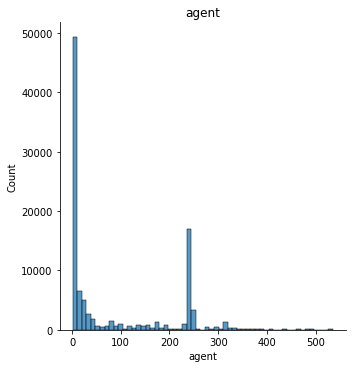

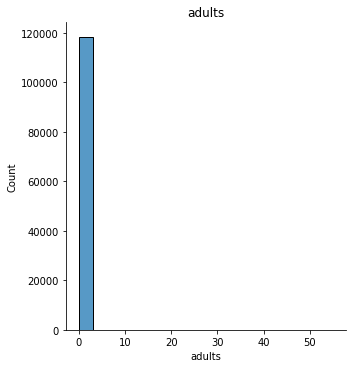

In [ ]:
# 이산형 변수 살펴보기
for col in numerical_feature:
  sns.displot(hotel.loc[hotel[col].notnull(), col])
  plt.title(col)
  plt.show()


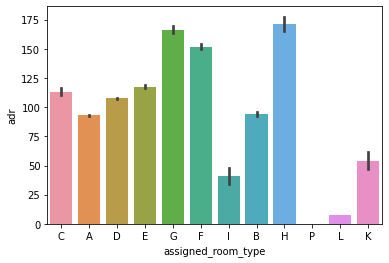

In [ ]:
# 어떤 객실이 평균 일일 숙박요금이 높을까?
# 숙박일수합을 곱해서 객실의 요금을 구할 수도 있을 듯

sns.barplot(data=hotel, x="assigned_room_type", y="adr")

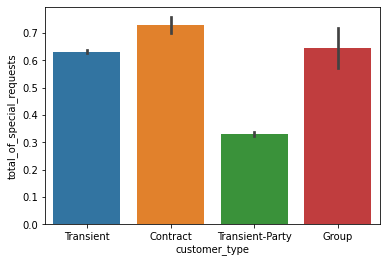

In [ ]:
# 고객유형별 특별 요구사항수

sns.barplot(data=hotel, x="customer_type", y="total_of_special_requests")

In [ ]:
# 월별 lead_time의 평균을 시각화

plt.figure(figsize=(10,10))
plt.plot(hotel.groupby('arrival_date_month').mean()['lead_time'], '-o')
plt.grid()       # 그리드 보조선 추가 

plt.title('lead time by months', fontsize=20)  # 제목
plt.xlabel('month', fontsize=20)               # x축 라벨 
plt.ylabel('lead_time', fontsize=20)           # y축 라벨

plt.axvline('September', color='r')            # 빨간 수직선 하이라이트 

<br>

---

<br>


## 2. 데이터 전처리



In [ ]:
#pd.set_option('display.max_rows', None)
#pd.reset_option('display')

In [4]:
hotel1 = hotel.copy()


<br>

### 2-1. 결측치 처리



* children 결측치 0으로 대체


In [5]:
hotel1.children.fillna(0, inplace=True)

hotel1.children.isnull().sum()

0


<br>

### 2-2. 데이터 속성 및 값 변경


* arrival_date_month 컬럼 데이터값 변경 ( ex. January → 1 )


In [6]:
# arrival_date_month 컬럼의 각 데이터 값을 범주형 숫자로 변경

hotel1.loc[hotel1.arrival_date_month == 'January', 'arrival_date_month'] = '1'
hotel1.loc[hotel1.arrival_date_month == 'February', 'arrival_date_month'] = '2'
hotel1.loc[hotel1.arrival_date_month == 'March', 'arrival_date_month'] = '3'
hotel1.loc[hotel1.arrival_date_month == 'April', 'arrival_date_month'] = '4'
hotel1.loc[hotel1.arrival_date_month == 'May', 'arrival_date_month'] = '5'
hotel1.loc[hotel1.arrival_date_month == 'June', 'arrival_date_month'] = '6'
hotel1.loc[hotel1.arrival_date_month == 'July', 'arrival_date_month'] = '7'
hotel1.loc[hotel1.arrival_date_month == 'August', 'arrival_date_month'] = '8'
hotel1.loc[hotel1.arrival_date_month == 'September', 'arrival_date_month'] = '9'
hotel1.loc[hotel1.arrival_date_month == 'October', 'arrival_date_month'] = '10'
hotel1.loc[hotel1.arrival_date_month == 'November', 'arrival_date_month'] = '11'
hotel1.loc[hotel1.arrival_date_month == 'December', 'arrival_date_month'] = '12'

In [8]:
hotel1.arrival_date_month.unique()

array(['7', '8', '9', '10', '11', '12', '1', '2', '3', '4', '5', '6'],
      dtype=object)


<br>

---

<br>

* meal 컬럼 순서형 컬럼으로 변경 ( ' SC ' , ' Undefined ' → 0 , ' BB ' → 1 , ' HB ' → 2 , ' FB ' → 3 )


In [7]:
# meal 컬럼의 범주를 수정하고 순서형 컬럼으로 변경

def meal_nums(x):
  if (x =='SC') or (x== 'Undefined'):
    x = 0
  elif x == 'BB':
    x = 1
  elif x == 'HB':
    x = 2
  else:
    x = 3
  return x
 
hotel1['meal'] = hotel1['meal'].apply(meal_nums)

In [9]:
hotel1.meal.unique()

array([1, 3, 2, 0])

<br>

---

<br>

* previous_cancellations ,  previous_bookings_not_canceled ,  booking_changes , days_in_waiting_list , required_car_parking 컬럼에 0 인 값이 압도적으로 많아서 0과 1이상인 값으로 나누어 범주형으로 변경 ( 0 → ' 0 ' , 1이상 → ' 1 ' )


In [10]:
# previous_cancellations , previous_bookings_not_canceled , booking_changes , days_in_waiting_list , required_car_parking 컬럼 범주형으로 변경 

hotel1['previous_cancellations'] = np.where(hotel1['previous_cancellations']==0, '0', '1')
hotel1['previous_bookings_not_canceled'] = np.where(hotel1['previous_bookings_not_canceled']==0, '0', '1')
hotel1['booking_changes'] = np.where(hotel1['booking_changes']==0, '0', '1')
hotel1['days_in_waiting_list'] = np.where(hotel1['days_in_waiting_list']==0, '0', '1')
hotel1['required_car_parking_spaces'] = np.where(hotel1['required_car_parking_spaces']==0, '0', '1')


<br>

---

<br>

* is_canceled , arrival_date_year , is_repeated_guest 컬럼 속성 object로 변경 

In [11]:
hotel1['is_canceled'] = hotel1['is_canceled'].astype(str)
hotel1['arrival_date_year'] = hotel1['arrival_date_year'].astype(str)
hotel1['is_repeated_guest'] = hotel1['is_repeated_guest'].astype(str)

hotel2 = hotel1.copy()

 
 <br>
 
 ### 2-3. 파생변수 생성

* stays_in_weekend_nights 와 stays_in_week_nights 값을 합한 stays_nights (총 숙박일수) 변수 생성


In [13]:
hotel2['stays_nights'] = hotel2['stays_in_weekend_nights'] + hotel2['stays_in_week_nights']

hotel2.stays_nights.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7, 14, 15, 10, 11,  8,  9, 21, 13, 12,
       18, 46, 28, 17, 19, 22, 23, 16, 29, 42, 20, 26, 33, 30, 56, 25, 27,
       60, 69, 35, 45, 38, 24, 48, 49, 57, 34, 43])


<br>

---

<br>

* children_babies_yn : 아이가 있는지 없는지 구분하는 변수 ( Y : 아이 있음 , N : 아이 없음 )

In [14]:
# children_babies_yn 파생변수 생성

hotel2['children_babies_yn'] = np.where(hotel2['children'] + hotel2['babies'] == 0, 'N', 'Y')

In [15]:
hotel2.children_babies_yn.value_counts()

N    110058
Y      9332
Name: children_babies_yn, dtype: int64

<br>

---

<br>

* arrival_season : 계절별 구분 변수 
( spring : 3 ~ 5월 , summer : 6 ~ 8월 , fall : 9 ~ 11월 , winter : 12 ~ 2월 )


In [16]:
# arrival_season 파생변수 생성

def quarter(x):
  if x in ('12', '1', '2'):
    x = 'winter'
  elif x in ('3', '4', '5'):
    x = 'spring'
  elif x in ('6', '7', '8'):
    x = 'summer'
  else:
    x = 'fall'
  return x
 
hotel2['arrival_season'] = hotel2['arrival_date_month'].apply(quarter)

In [17]:
hotel2.arrival_season.value_counts()

summer    37477
spring    32674
fall      28462
winter    20777
Name: arrival_season, dtype: int64

In [18]:
# 계절별 취소여부 비율 확인

hotel2[['arrival_season', 'is_canceled']].value_counts() / len(hotel2['is_canceled']) *100 

arrival_season  is_canceled
summer          0              19.231929
spring          0              17.023201
fall            0              15.058213
summer          1              12.158472
winter          0              11.645029
spring          1              10.344250
fall            1               8.781305
winter          1               5.757601
dtype: float64

<br>

---

<br>

* room_same : 예약한 객실과 실제 배정된 객실 등급 변경여부를 구분하는 변수 ( DG : 등급 하락 , SG : 등급 동일, UG : 등급 상승 )


In [19]:
# reserved_room_type
hotel2.loc[hotel2.reserved_room_type == 'A', 'reserved_room_type'] = 1
hotel2.loc[hotel2.reserved_room_type == 'B', 'reserved_room_type'] = 1 
hotel2.loc[hotel2.reserved_room_type == 'I', 'reserved_room_type'] = 1 
hotel2.loc[hotel2.reserved_room_type == 'K', 'reserved_room_type'] = 1 
hotel2.loc[hotel2.reserved_room_type == 'P', 'reserved_room_type'] = 1

hotel2.loc[hotel2.reserved_room_type == 'D', 'reserved_room_type'] = 2 
hotel2.loc[hotel2.reserved_room_type == 'E', 'reserved_room_type'] = 2 
hotel2.loc[hotel2.reserved_room_type == 'L', 'reserved_room_type'] = 2 

hotel2.loc[hotel2.reserved_room_type == 'C', 'reserved_room_type'] = 3 
hotel2.loc[hotel2.reserved_room_type == 'F', 'reserved_room_type'] = 3 
hotel2.loc[hotel2.reserved_room_type == 'G', 'reserved_room_type'] = 3 
hotel2.loc[hotel2.reserved_room_type == 'H', 'reserved_room_type'] = 3 


# assigned_room_type
hotel2.loc[hotel2.assigned_room_type == 'A', 'assigned_room_type'] = 1 
hotel2.loc[hotel2.assigned_room_type == 'B', 'assigned_room_type'] = 1 
hotel2.loc[hotel2.assigned_room_type == 'I', 'assigned_room_type'] = 1 
hotel2.loc[hotel2.assigned_room_type == 'K', 'assigned_room_type'] = 1 
hotel2.loc[hotel2.assigned_room_type == 'P', 'assigned_room_type'] = 1 

hotel2.loc[hotel2.assigned_room_type == 'D', 'assigned_room_type'] = 2 
hotel2.loc[hotel2.assigned_room_type == 'E', 'assigned_room_type'] = 2 
hotel2.loc[hotel2.assigned_room_type == 'L', 'assigned_room_type'] = 2 

hotel2.loc[hotel2.assigned_room_type == 'C', 'assigned_room_type'] = 3 
hotel2.loc[hotel2.assigned_room_type == 'F', 'assigned_room_type'] = 3 
hotel2.loc[hotel2.assigned_room_type == 'G', 'assigned_room_type'] = 3 
hotel2.loc[hotel2.assigned_room_type == 'H', 'assigned_room_type'] = 3


In [20]:
# (assigned_room_type - reserved_room_type) 연산을 room_same 컬럼에 DG, SG, UG 코드로 저장

hotel2.loc[hotel2.assigned_room_type - hotel2.reserved_room_type > 0, "room_same"] = 'UP'
hotel2.loc[hotel2.assigned_room_type - hotel2.reserved_room_type == 0, "room_same"] = 'SG'
hotel2.loc[hotel2.assigned_room_type - hotel2.reserved_room_type < 0, "room_same"] = 'DG'

In [21]:
hotel3 = hotel2.copy()
hotel3.shape

(119390, 36)


<br>

### 2-4. 이상값 처리

* 예약인원이 0명인 데이터는 이상치로 간주하여 제거


In [22]:
# adults , children , babies 값이 모두 0인 데이터 제거

hotel3.drop( hotel3.loc[(hotel3.adults == 0) & (hotel3.children == 0) & (hotel3.babies == 0)].index , inplace=True )   
hotel3.shape

(119210, 36)

<br>

---

<br>

* 어른이 0명이면서 개인적으로 예약한 고객의 경우( customer_type = 'Transient' ) 이상치로 간주하여 제거


In [23]:
# 어른 수가 0일때, 어린이 수, 아이수, 고객 유형 확인

hotel3[['children', 'babies','customer_type']][hotel3.adults == 0].value_counts().sort_index().reset_index()

,children,babies,customer_type,0
0,1.0,0,Transient,3
1,1.0,0,Transient-Party,1
2,2.0,0,Contract,1
3,2.0,0,Group,1
4,2.0,0,Transient,131
5,2.0,0,Transient-Party,72
6,2.0,1,Transient,2
7,2.0,1,Transient-Party,1
8,3.0,0,Transient,3
9,3.0,0,Transient-Party,8


In [24]:
# adults가 0 이면서 고객유형이 'Transient'인 데이터 제거

hotel3.drop( hotel3.loc[(hotel3.adults == 0) & (hotel3.customer_type == 'Transient')].index, inplace=True)
hotel3.shape

(119071, 36)

<br>

---

<br>

* 총 숙박일수가 0일인 데이터 이상치로 간주하여 제거


In [26]:
# stays_nights 가 0인 행 제거

hotel3 = hotel3[hotel3.stays_nights > 0]
hotel3.shape

(118426, 36)


<br>

---

<br>

* arrival_date_year 가 2015인것 중에 arrival_date_month가 7, 8인 데이터 제거 (7, 8월만 다른 월과 달리 3번 들어가기 때문)

In [27]:
# 연도별 7월, 8월의 건수 조회

hotel3[(hotel3['arrival_date_month']=='7') | (hotel3['arrival_date_month']=='8')].groupby(['arrival_date_year', 'arrival_date_month'])['is_canceled'].count()

arrival_date_year  arrival_date_month
2015               7                     2754
                   8                     3862
2016               7                     4526
                   8                     5019
2017               7                     5285
                   8                     4913
Name: is_canceled, dtype: int64

In [28]:
# 2015년 7월, 2015년 8월 데이터 제거

hotel3.drop(hotel3.loc[(hotel3['arrival_date_year'] == '2015') & (hotel3['arrival_date_month'] == '7')].index, inplace = True)

hotel3.drop(hotel3.loc[(hotel3['arrival_date_year'] == '2015') & (hotel3['arrival_date_month'] == '8')].index, inplace = True)


<br>

---

<br>


* market_segment , distribution_channel 각각의 값이 'Undefined'인 행 제거


In [29]:
hotel3.drop( hotel3.loc[(hotel3.market_segment=='Undefined') | (hotel3.distribution_channel=='Undefined')].index, inplace=True )  
hotel3.shape

(111810, 36)


<br>



---
<br>

* adr 값이 0 보다 작은 행 제거

In [30]:
hotel3.drop(hotel3.loc[(hotel3.adr < 0)].index, inplace=True)

hotel4 = hotel3.copy()
hotel4.shape

(111809, 36)


<br>

### 2-5. 불필요한 컬럼 제거

 - stays_in_weekend_nights ,  stays_in_week_nights →  stays_nights 변수 생성하여 제거
 - arrival_date_month → arrival_season 변수 생성하여 제거
 - arrival_date_week_number , arrival_date_day_of_month , conutry → 범주가 너무 많아서 무의미한것으로 판단하여 제거
 - agent , company → id 값이므로 제거
 - deposit_type → 해당 호텔의 카드이슈로 인한 부정확한 값이므로 제거
 - reserved_room_type , assigned_room_type → room_same 변수 생성하여 제거
 - reservation_status,  reservation_status_date → 무의미하다고 판단하여 제거


In [31]:
# 최종 분석용 데이터셋 생성

data = hotel4.drop(['stays_in_weekend_nights', 'stays_in_week_nights',
                    'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'country', 
                    'reserved_room_type', 'assigned_room_type', 
                    'deposit_type', 'agent', 'company', 
                    'reservation_status', 'reservation_status_date'], axis=1) 
data.shape


(111809, 23)

In [32]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'adults',
       'children', 'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'stays_nights', 'children_babies_yn', 'arrival_season', 'room_same'],
      dtype='object')

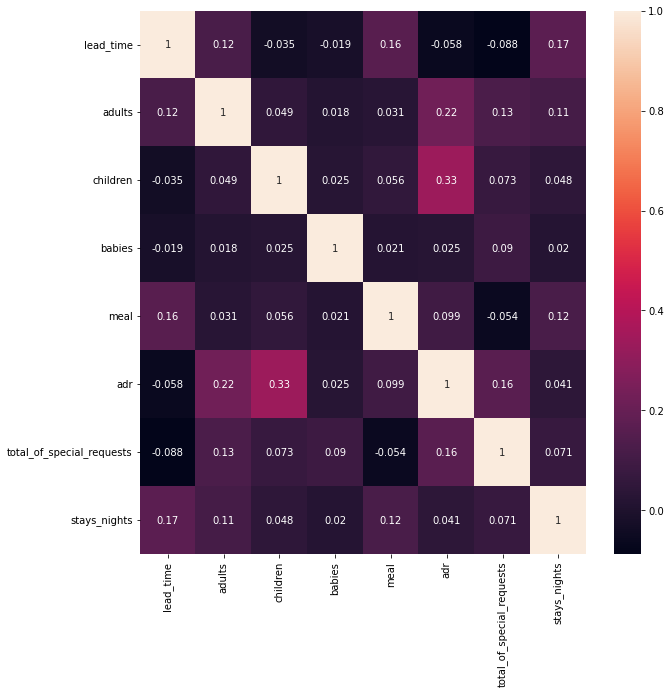

In [33]:
# 분석용 데이터셋 연속형 컬럼 상관관계 확인 (heatmap)

plt.figure(figsize=(10,10))
# 상관계수 보기
sns.heatmap(data.corr(), annot=True)

## 3. 모델링

### 3-1. 원핫인코딩

In [ ]:
### One-hot encoding

X = pd.get_dummies(data.loc[:, data.columns != 'is_canceled'], drop_first=True)
y = data['is_canceled']

X.shape

(111809, 35)

### 3-2. 표준화 스케일링

In [ ]:
### train, test 나누기

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
### 표준화

scaler = StandardScaler()
scaler.fit(X_tr)

X_tr_sc = scaler.transform(X_tr)
X_te_sc = scaler.transform(X_te)

### 3-3. 모델 학습 및 성능 평가

In [ ]:
### 랜덤포레스트 모델 학습

rf = RandomForestClassifier(random_state=11)

rf.fit(X_tr_sc, y_tr)

pred_tr = rf.predict(X_tr_sc)
pred_te = rf.predict(X_te_sc)

In [ ]:
### 모델 성능 평가

accuracy_tr = accuracy_score(y_tr, pred_tr)
accuracy_te = accuracy_score(y_te, pred_te)
print(accuracy_tr)
print(accuracy_te)


cm = confusion_matrix(y_te, pred_te)
print(cm)

0.9906856106099712
0.8611334704707391
[[19391  1716]
 [ 2942  9494]]


### 3-4. 변수 중요도 확인 및 시각화

In [ ]:
### 변수 중요도 확인

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("{}. feature {} ({:.3f})".format(f + 1, X.columns[indices][f], importances[indices[f]]))

Feature ranking:
1. feature lead_time (0.256)
2. feature adr (0.176)
3. feature total_of_special_requests (0.085)
4. feature stays_nights (0.078)
5. feature previous_cancellations_1 (0.038)
6. feature market_segment_Groups (0.031)
7. feature customer_type_Transient (0.030)
8. feature room_same_SG (0.026)
9. feature customer_type_Transient-Party (0.025)
10. feature booking_changes_1 (0.024)
11. feature required_car_parking_spaces_1 (0.024)
12. feature meal (0.021)
13. feature adults (0.021)
14. feature hotel_Resort Hotel (0.017)
15. feature room_same_UP (0.015)
16. feature market_segment_Online TA (0.013)
17. feature market_segment_Offline TA/TO (0.012)
18. feature arrival_date_year_2016 (0.012)
19. feature distribution_channel_TA/TO (0.012)
20. feature arrival_season_spring (0.011)
21. feature arrival_season_summer (0.010)
22. feature arrival_date_year_2017 (0.010)
23. feature arrival_season_winter (0.009)
24. feature market_segment_Direct (0.008)
25. feature days_in_waiting_list_1 (0.

<Figure size 432x288 with 0 Axes>

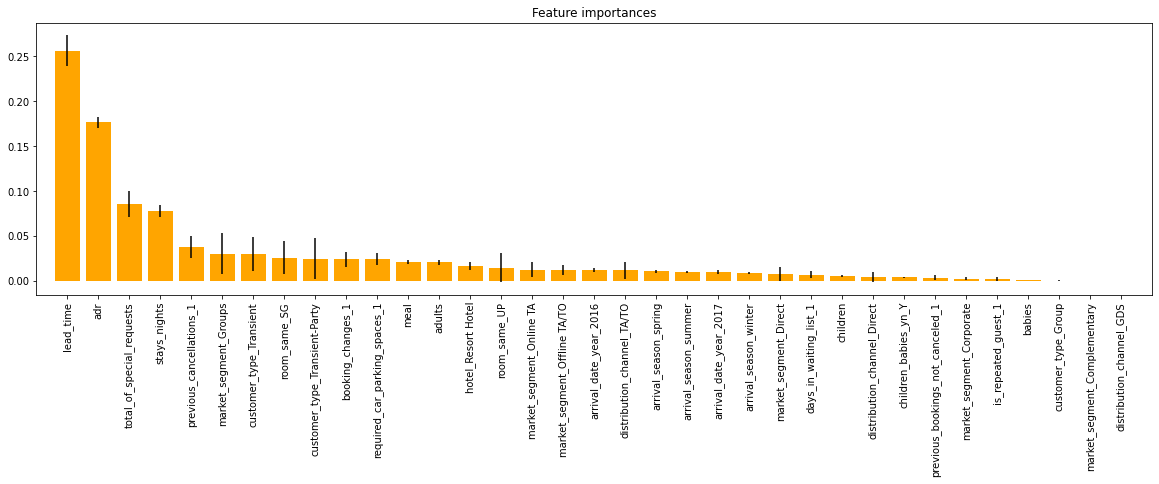

In [ ]:
# 변수중요도 시각화

plt.figure()
plt.figure(figsize=(20,5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color='orange',
        yerr=std[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()